## Rayyan Minhaj (20K-0143 | BCS-8B)

## Task 1
Use HeartDisease dataset and apply LinearRegression and then pass the result to sigmoid function (write from scratch) and then compare the accuracy of both models.

In [1]:
#hello 123
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataframe = pd.read_csv('heart_disease_dataset_UCI.csv')

In [2]:
X = dataframe.iloc[:,0:13]
y = dataframe.iloc[:,13]
X = X.values
y = y.values
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.25,random_state=40)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

lr=LinearRegression()


In [7]:
model1=lr.fit(X_train,y_train)
model1.score(X_train, y_train)

0.48724560922795435

In [8]:
prediction1=model1.predict(X_test)

print(prediction1)

[ 0.54907639  0.85503797  0.86728264  0.37959702  0.56696361  0.94317511
  0.71005286 -0.15215499 -0.16480011  0.92676566  0.29585479  0.70422634
  0.70994404 -0.33225403  0.18031199  0.60370208  0.6257385   0.64245079
  0.58127542  0.0597508   0.83454693  0.71899944  0.54325831  0.82091343
 -0.09896038  1.09548148  0.11632565  0.82281008  0.6801392   0.656639
  0.72188277  0.13151571  0.21459572  1.01497761  0.85813235  0.83774798
 -0.08627096  0.40540544  0.37157365  0.58616021  0.69149253  0.83117376
  1.16603064  0.17809794  1.13509738  0.69225136  0.96623971  0.02907414
  0.18971203 -0.09898736  0.78934168  0.63210982  0.64263239 -0.05500443
  0.87297013  0.83048963  0.10898812  0.93972232  0.10489792  0.23647941
  0.80469132  0.92316842  1.12639498  0.76670608  1.17306018  1.06754501
  0.51586866  0.2441576   0.35447147  0.28868546  0.10327922 -0.07789647
  0.25566344  0.23890589  0.85271188  0.44071855]


In [27]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

new_pred=[]
for x in prediction1:
    new_pred.append(sigmoid(x))

#uncomment if you would like to view the continuous values after applying sigmoid
#print(new_pred)


#keeping the threshold 0.6 here because most of the values were above 0.5
bin_pred=[]
for i in range (0,len(new_pred)):
    if new_pred[i]>0.6:
        bin_pred.append(1)
    else:
        bin_pred.append(0)

print(new_pred)
print(bin_pred)



[0.633921280455707, 0.7016229034537862, 0.7041799573796539, 0.5937759062289091, 0.6380622485603105, 0.7197405677876929, 0.6704128387590864, 0.46203446944555976, 0.4588929652697149, 0.7164186479266914, 0.5734288738368161, 0.6691241390160889, 0.6703887935001245, 0.4176922844733045, 0.5449562592113445, 0.6465028271817101, 0.6515225527027493, 0.6553072544321475, 0.6413608269063288, 0.5149332576104075, 0.6973154944776019, 0.6723866489363073, 0.6325700568178466, 0.6944302010948596, 0.4752800765417959, 0.7494125135669377, 0.5290486630584157, 0.6948325155899872, 0.6637697641926885, 0.6585049825056498, 0.6730214802184318, 0.5328316183127474, 0.5534439898336694, 0.7339931449383048, 0.702270301406439, 0.6979907022804619, 0.4784456276577807, 0.5999856798344105, 0.5918391740950127, 0.6424836354846647, 0.6662988643581511, 0.6966030569827719, 0.76242678515465, 0.5444071679917656, 0.7567783747841577, 0.6664675653577312, 0.724369357828264, 0.507268022832644, 0.5472862714675635, 0.47527334751052186, 0.6

<AxesSubplot:>

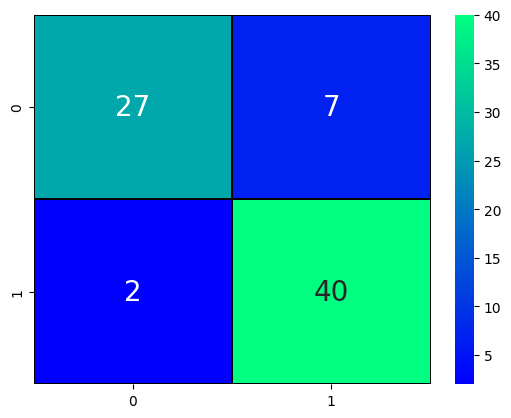

In [28]:
# Confusion Matrix
cm=confusion_matrix(y_test,bin_pred)
sns.heatmap(cm,annot=True,cmap='winter',linewidths=0.3,
linecolor='black',annot_kws={"size":20})

In [29]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Linear Regression + Sigmoid:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Linear Regression + Sigmoid:',(TP/(TP+FN)))
print('Testing Specificity for Linear Regression + Sigmoid:',(TN/(TN+FP)))
print('Testing Precision for Linear Regression + Sigmoid',(TP/(TP+FP)))

Testing Accuracy for Linear Regression + Sigmoid: 0.881578947368421
Testing Sensitivity for Linear Regression + Sigmoid: 0.9310344827586207
Testing Specificity for Linear Regression + Sigmoid: 0.851063829787234
Testing Precision for Linear Regression + Sigmoid 0.7941176470588235


We can compare these results with the one from Logistic Regression as seen in image below:-
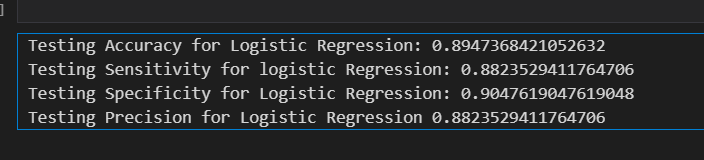



## TASK 2

Calculate binary cross entropy loss on the above experiment. Write from scratch.

In [48]:
N=len(dataframe)
#we need to get total num of rows

303

In [44]:
#-1/N * SUMMATION{bin_pred[i] * ln(new_pred[i]) + (1-bin_pred[i]) * ln(1 - new_pred[i])}

def bin_cross_entropy_loss(new_pred, bin_pred):
    val = bin_pred*np.log(new_pred) + (1-bin_pred)*np.log(1-new_pred)
    return val


for i in range(0,len(new_pred)):
    _val= (bin_cross_entropy_loss(new_pred[i],bin_pred[i]))
    x +=_val

x = -1/N * x
print(f'Binary Cross Entropy Loss: {x}')

Binary Cross Entropy Loss: 0.13050569749918317


## TASK 3

Download a new dataset from UCI Repository https://archive.ics.uci.edu/ml/datasets.php
and evaluate its accuracy on 5 cross fold.

In [81]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


### Using the Dry Bean dataset

In [84]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dry_bean_dataset = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean_dataset.data.features 
y = dry_bean_dataset.data.targets 
  
print(X.shape, y.shape)


(13611, 16) (13611, 1)


In [85]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [86]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [97]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
acc=100*np.mean(scores)


print(f'Accuracy (Mean) of 5 cross folds: {acc:0.3f} %')
print("Cross-Validation Scores: ", scores)

#print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy (Mean) of 5 cross folds: 70.325 %
Cross-Validation Scores:  [0.70620639 0.68993387 0.71932403 0.70720059 0.69360764]


## TASK 4

Consider a logistic regression model with w1=0.5 and w2=0.31 and b=0.09. X1 = 5, X2 = 3 and actual y is 1. Calculate this numerical by hand and verify your answers by coding the functions below.

Write below functions from scratch:
- ForwardPropagation()
- LossCalculation()
- BackwardPropagation() -> This function must update the old weights
- MainLoop which must iterate 5 times and call all the above functions.

In [111]:
#first we will need initial weights and bias
x_vals=[5,3]
weights=[0.5,0.31]
bias=0.09
y=1

def ForwardPropagation(x_vals,weights,bias):
    #y_pred is y_hat here
    y_pred=x_vals[0]*weights[0] + x_vals[1]*weights[1] + bias
    sigmoid = 1/(1+np.exp(-y_pred))

    return y_pred,sigmoid

def LossCalculation(sigmoid):
    loss=-(y*np.log(sigmoid) + (1-y)*np.log(1-sigmoid))
    return loss

def BackwardPropagation(x_vals,y,y_pred,weights,bias):
    #calculating learning rates
    dL_dw1=x_vals[0]*(y_pred-y)
    w1_new = weights[0] - (0.01)*dL_dw1
    weights[0]=w1_new

    dL_dw2=x_vals[1]*(y_pred-y)
    w2_new = weights[1] - (0.01)*dL_dw2
    weights[1]=w2_new

    dL_db=(y_pred-y)
    b_new = bias - (0.01)*dL_db
    bias=b_new #updated the bias

    return weights, bias


#Main Loop
for i in range(0,5):
    print(f'\x1b[32mIteration #{i+1}\x1b[0m')
    y_pred,sigmoid=ForwardPropagation(x_vals,weights,bias)
    print(f'Predicted y: {y_pred:0.3f}\nSigmoid: {sigmoid:0.3f}')


    loss=LossCalculation(sigmoid)
    print(f'Loss(y, y_pred): {loss:0.3f}')

    weights,bias = BackwardPropagation(x_vals,y,y_pred,weights,bias)
    print(f'Updated Weights: {weights}, Updated Bias: {bias}')

    print("\n\n")



Iteration #1
Predicted y: 3.520
Sigmoid: 0.971
Loss(y, y_pred): 0.029
Updated Weights: [0.374, 0.2344], Updated Bias: 0.0648



Iteration #2
Predicted y: 2.638
Sigmoid: 0.933
Loss(y, y_pred): 0.069
Updated Weights: [0.2921, 0.18526], Updated Bias: 0.04842



Iteration #3
Predicted y: 2.065
Sigmoid: 0.887
Loss(y, y_pred): 0.119
Updated Weights: [0.23886500000000002, 0.153319], Updated Bias: 0.037772999999999994



Iteration #4
Predicted y: 1.692
Sigmoid: 0.844
Loss(y, y_pred): 0.169
Updated Weights: [0.20426225, 0.13255735], Updated Bias: 0.03085244999999999



Iteration #5
Predicted y: 1.450
Sigmoid: 0.810
Loss(y, y_pred): 0.211
Updated Weights: [0.1817704625, 0.11906227749999998], Updated Bias: 0.02635409249999999



